# Neural Network Full Course 2022 with Simplilearn

All exercises are based on simplilearn videos.

https://www.youtube.com/watch?v=KiW-W4v0nBo&t=11778s

## Neural Network Theory

Forward Propagation
Backpropagation


#### Neural Network In 5 Minutes | What Is A Neural Network? | How Neural Networks Work | Simplilearn
https://www.youtube.com/watch?v=bfmFfD2RIcg

As on example below:
- each pixel of circle image is input data
- the input is multiplied to corresponding weight
- bias is a result of activation function
- neuron based on calculation might be activated or not
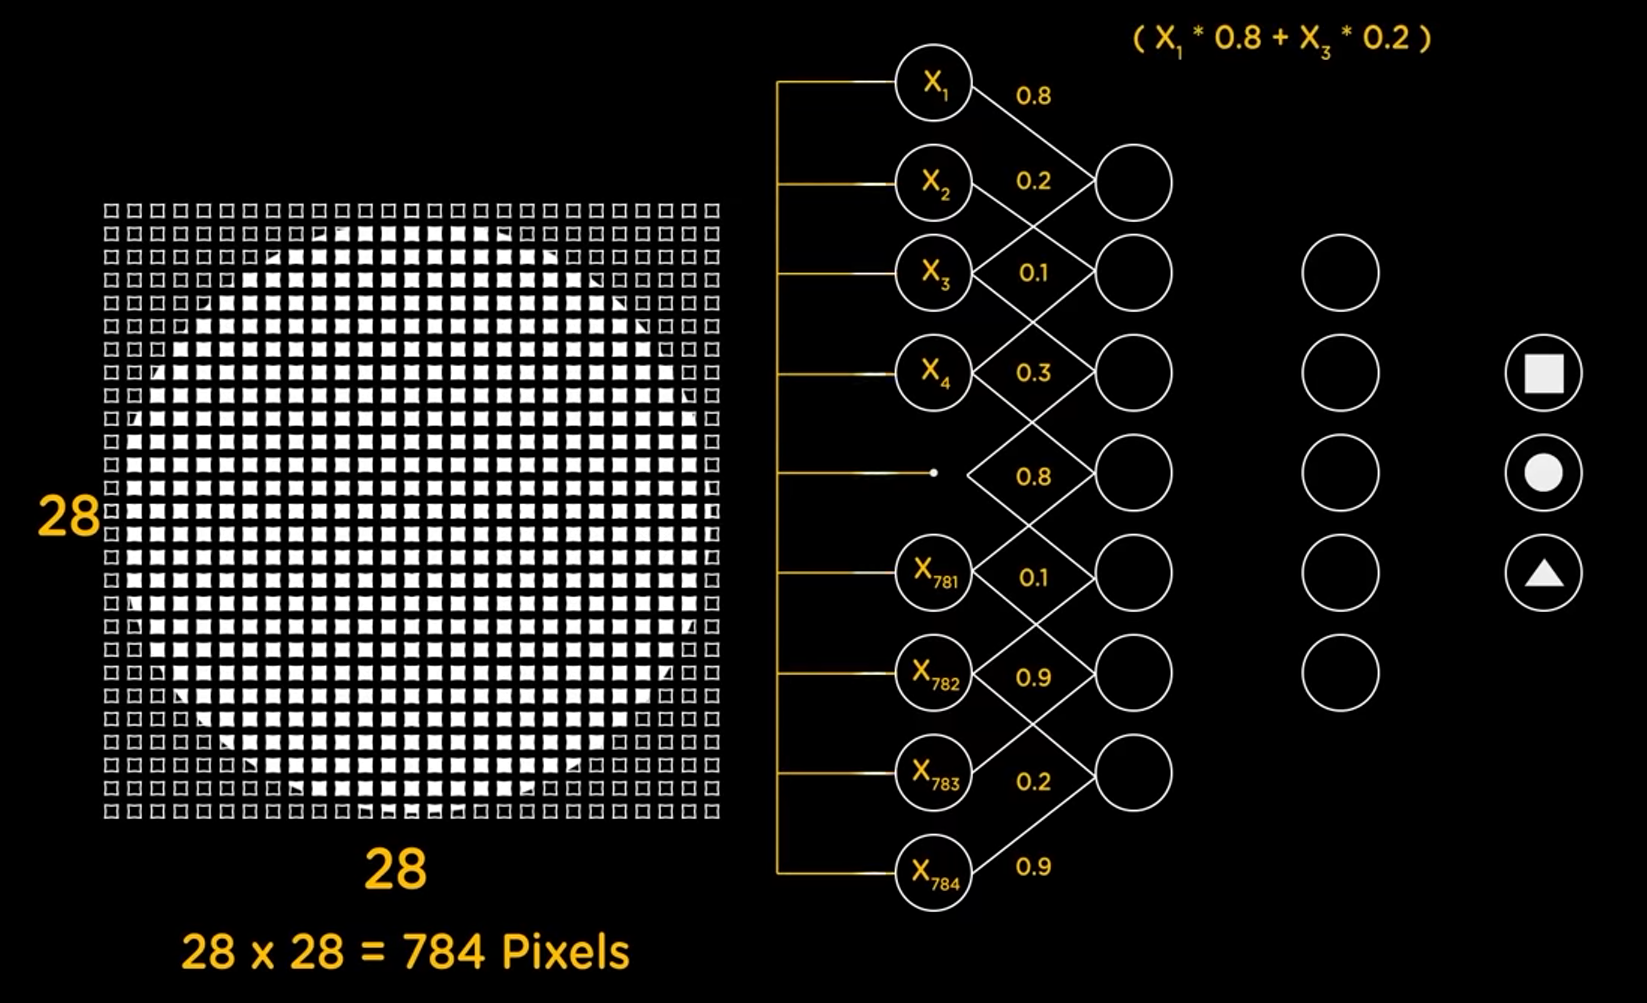

### Complete Neutral Tutorial

#### What is deep learning?

Machine learning technique that teaches computers to learn by example

#### What is artificial neural network?

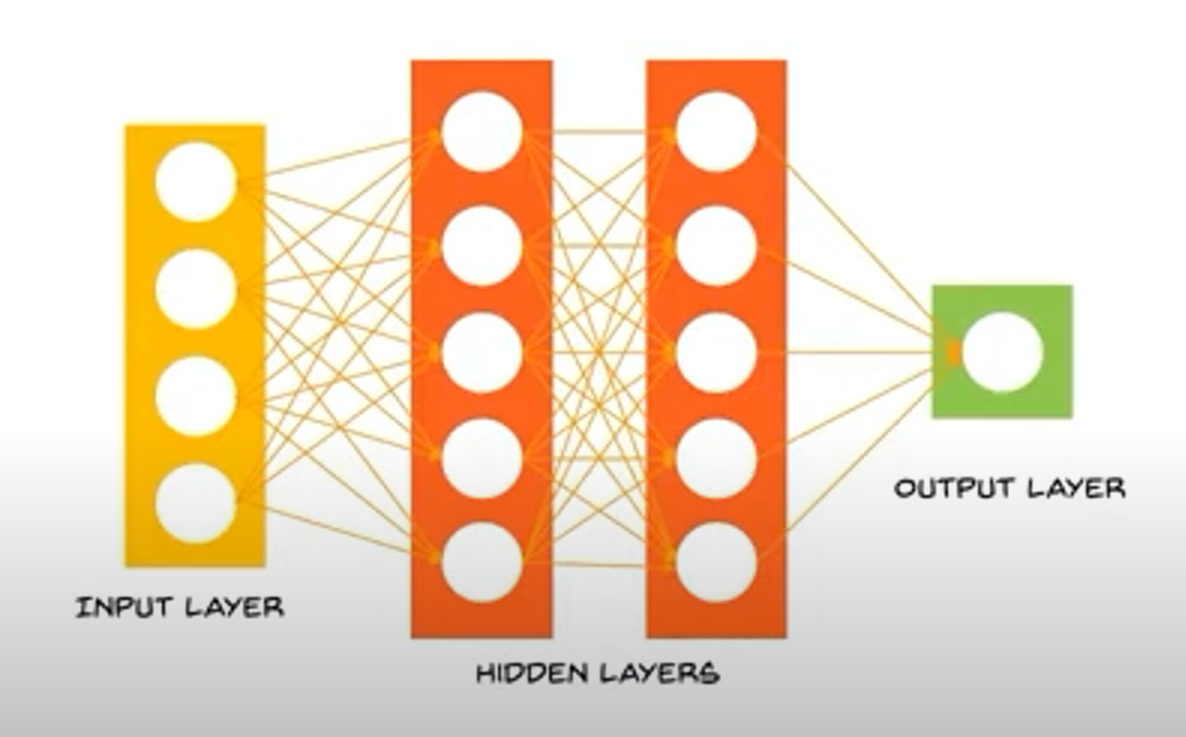

Hidden layers are features extraction

A neural network is a system of hardware and/or software patterned after the operation of neurons in the human brain. Neural networks also called artificial neural networks is a way of achieving deep learning


#### How does neural network work?

Input layer - picks up input signals and passes them to the next layer, pixels in the form of arrays are feeding input for example
Hidden layer - does all kinds of calculations and feature extraction
Output layer - delivers the final result


#### Activation functions
In hidden layer step

##### Sigmond function
Used when the model is predicting probability

##### Threshold function
if Do not want to worry of the uncertainity in the middle
used when the output depends on a threshold value
either 0 or 1

##### Relu function
it gives an output X if X is positive otherwise 0
Fast


##### Hyperbolic tangent functiom
Similar to sigimond function with a range of (-1,1)


Error in the output is backpropagated (backpropagation) through the network and weights are adjusted to minimize the error rate. This is calculated by a cost function.

The output is compared with the original result and multiple iterations are done to get the maximum **accuracy**.

### Types of artificial neural network

#### Feedforward neural network
Simplest, only one direction Input --> Output
For Vision and Speech recognition

#### Radial Basis Function neural network
Classifies the data point based on its distance from a center point
For power restoration systems

#### Kohonene self organizing neural network
Vectors of random dimensions are input to discrete map comprised of neurons
For recognize patterns in data like in medical analysis

#### Recurrent neural network
The hidden layers saves its output to be used for future predictions
Text to speech, conversion model

#### Convolution neural network
The input features are taken in batches like a filter, this allows the network to remember an image in parts
Signal and image processing

#### Modular neural network
It has a collection of different neural networks working tohether to get the output
under research

#### Convolution neural network
The input features are taken in batches like a filter, this allows the network to remember an image in parts
Signal and image processing


# Code

libraries

###### Keras - add layers on

### Use Case - Implementation

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [39]:
# initialising the CNN (classifier neural network)
classifier = Sequential()


# STEP 1
#convolution (??????)
#picking function with activation
# am adding first layer, 64x64x3 - pictures 64x64 piksels with 3 values - needs to match if u input photos
#after giving input shape in firs layer u do not need to give it to other layers
#conv2D used to convert from photo to two dimensional 
classifier.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))

# STEP 2
# pooling
#reducing to two sets from 64x64 to 2x2

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [40]:
# STEP 3
#Flattening - to two dimension
classifier.add(Flatten())

# STEP 4
# Full CONNECTION
# 64 + 64 = 128
#1 for simple output True/False
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [41]:
# compiling the CNN

#adam is most popular, is fine
#loss how compute the error - it can by std
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [42]:
# fitting the cnn to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [43]:
training_set = train_datagen.flow_from_directory('training_set',
                                  target_size = (64, 64),
                                  batch_size = 32,
                                  class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [44]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('test_set',
                                  target_size = (64, 64),
                                  batch_size = 32,
                                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [67]:
# training the model
#am having problem with original 8000, 25, 2000 setting

classifier.fit(training_set,
                        epochs = 1,
                        validation_data = test_set,
                        validation_steps = 10)

250/250 [==============================] - 32s 126ms/step - loss: 0.3561 - accuracy: 0.8413 - val_loss: 0.5411 - val_accuracy: 0.7656


val_acc - what is actualy on test data it can be 1 if dataset is waaaaaaaaaaaaay to little as above
acc - 

In [75]:
import numpy as np
import keras.utils as utils


test_image = utils.load_img('single_prediction/cat_or_dog_6.jpg', target_size = (64, 64))
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 20ms/step
cat


array([[1.]], dtype=float32)